In [34]:
#Importamos librerias
import numpy as np 
import matplotlib.pyplot as plt

In [35]:
#Función para leer la información de nsga
def read_nsga_data(file_name):
    data = []
    file = open(file_name, "r")

    flg = True
    gen = []
    for line in file:

        #Nos saltamos la primera linea
        if(flg):
            flg=False
            continue

        #Verificamos si la linea es de una generacion para pasar a la siguiente data
        if(len(line.split()) == 4):
            if(len(gen) > 0):
                data.append(gen)
            gen = []
            continue


        #Procesamos las lineas de generaciones
        line = line.strip().split()
        value = float(line[0].strip()) * -1
        total_cost = float(line[1].strip())
        rank = int(line[-3])
        point = [value, total_cost, rank]

        gen.append(point)

    #Agregamos la última generacion
    data.append(gen)
    return data

#Función para leer la data de ampl
def read_ampl_data(file_name):
    file = open(file_name, "r")
    flg = False

    #Nos falta processar la info de ampl
    x_ampl = []
    y_ampl = []

    for line in file:
        
        #Nos saltamos la primera linea
        if not flg:
            flg = True
            continue

        if line.strip() == 0 or line.strip() == ";":
            break
        
    

        #Ahora procesamos las lienas
        data = line.strip().split()
        x_ampl.append(np.floor(float(data[3])) * -1)
        y_ampl.append(int(data[4]))

    return (x_ampl, y_ampl)


#Función para mostrar una generación de nsga2
def show_gen_nsga2(data, gen):
    gen_to_show = gen #-1 is the last generation

    #Obtenemos los puntos de la generación
    all_points = np.array(data[gen_to_show])
    x = all_points[:, 0]
    y = all_points[:, 1]

    #Definimos colores para cada rango
    ranks = all_points[:, 2].astype(int)
    unique_ranks = np.unique(ranks)
    colors = plt.cm.get_cmap('tab10', len(unique_ranks))

    #Graficamos cada punto con su color
    plt.figure()
    for i, rank in enumerate(unique_ranks):

        #Mostramos todos los putnos con el rank actual
        mask = ranks == rank
        plt.scatter(x[mask], y[mask], color=colors(i), label=f'Rank {rank}')

    #plt.title("Frente de pareto NSGA2")
    plt.legend()
    plt.xlabel("L (maximize value)")
    plt.ylabel("O (minimize costs)")
    plt.grid(True)
    plt.show()

    

In [36]:
#Procesamos los datos de las poblaciones
names_nsga = ["small.out", "big.out", "huge.out"]
names_ampl = ["toy_data.txt", "big_data.txt", "huge_data.txt"]

instance_index = 0
#Leemos los datos de nsga2
data_small_nsga = read_nsga_data("small.out")
data_big_nsga = read_nsga_data("big.out")
data_huge_nsga = read_nsga_data("huge.out")


#Leemos los datos de ampl
data_small_ampl = read_ampl_data("toy_data.txt")
data_big_ampl = read_ampl_data("big_data.txt")



C:\Users\basti\AppData\Local\Temp\ipykernel_10100\811519211.py:77: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_ranks))


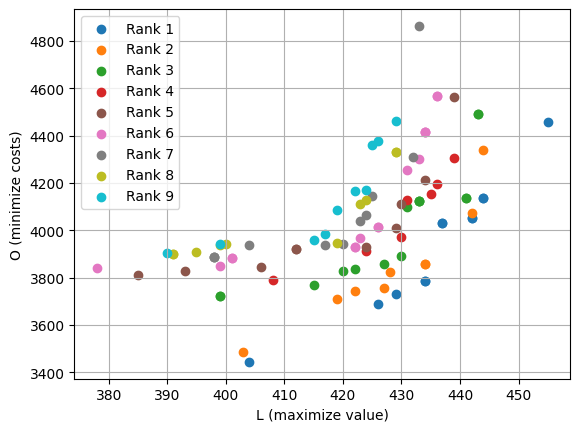

In [37]:
show_gen_nsga2(data_huge_nsga, 1)


In [38]:
#Ahora creamos otro código para que ambos frentes se muestren
def show_both(data_ampl, data_nsga2):

    x_ampl, y_ampl = data_ampl

    all_points = np.array(data_nsga2)
    x_nsga = all_points[:, 0]
    y_nsga = all_points[:, 1]
    

    plt.figure()
    plt.scatter(x_ampl, y_ampl, alpha=1, label="AMPL")
    plt.scatter(x_nsga, y_nsga, alpha=1, marker="x", label="NSGA")
    #plt.title("Resultados Conjunto de datos 1")
    plt.xlabel("L (maximize value)")
    plt.ylabel("O (minimize costs)")
    plt.legend()
    plt.grid(True)
    plt.show()


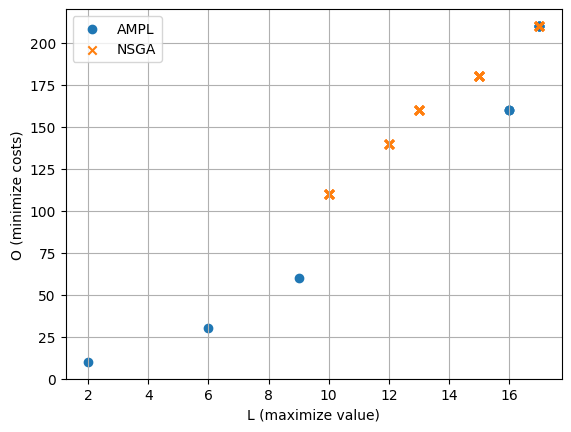

In [39]:
#Comparamos tamaños para instancias pequeñas



points_ampl = data_small_ampl
points_nsga = read_nsga_data("small_nsga_1500_0.4_0.8.out")[-1]
show_both(points_ampl, points_nsga)

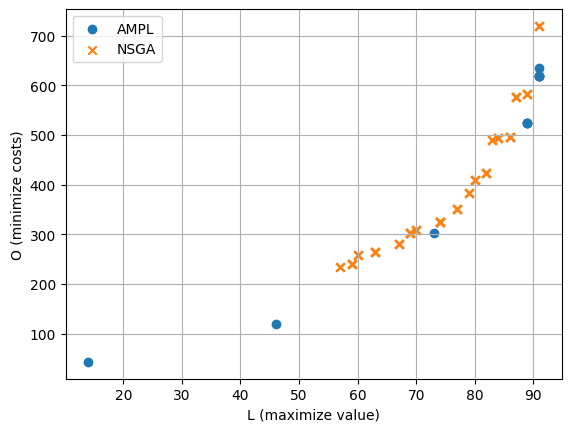

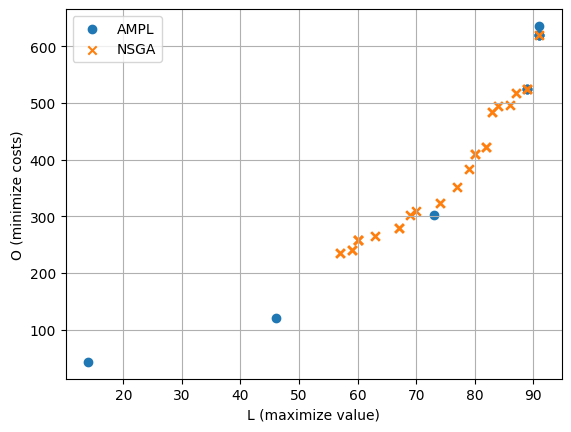

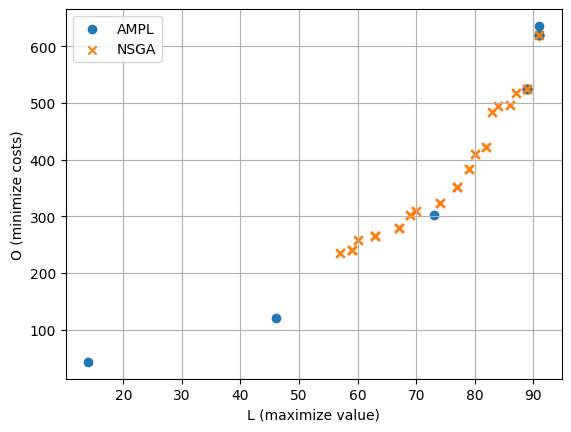

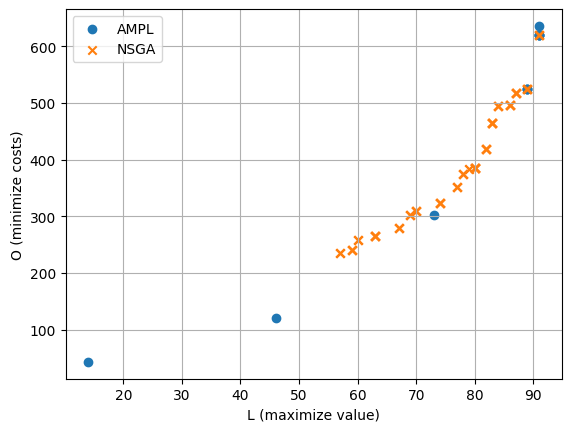

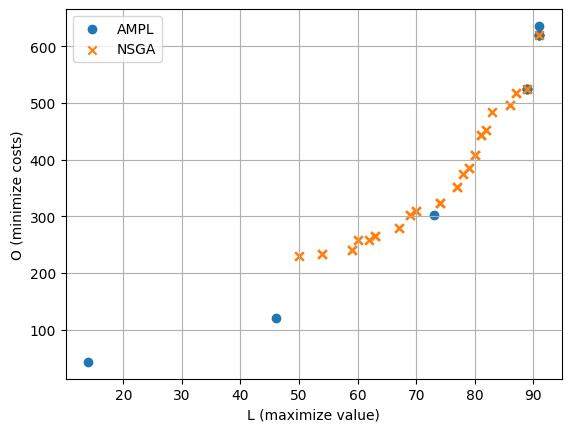

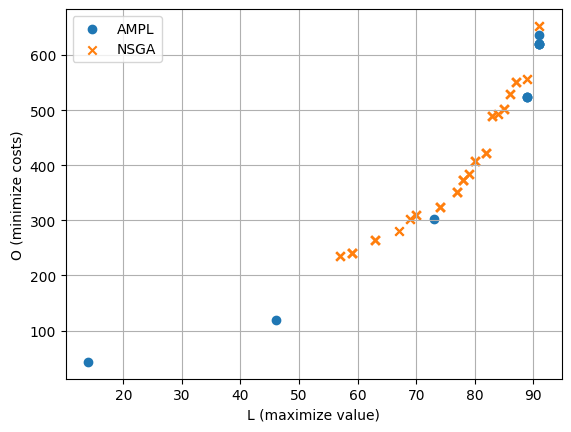

In [40]:
#Comparamos parámetros para isntancias medianas
points_ampl = data_big_ampl

points_nsga = read_nsga_data("big_nsga_1000_0.4_0.8.out")[-1]
show_both(points_ampl, points_nsga)

points_nsga = read_nsga_data("big_nsga_1500_0.4_0.8.out")[-1]
show_both(points_ampl, points_nsga)

points_nsga = read_nsga_data("big_nsga_2000_0.4_0.8.out")[-1]
show_both(points_ampl, points_nsga)


points_nsga = read_nsga_data("big_nsga_5000_0.4_0.8.out")[-1]
show_both(points_ampl, points_nsga)


points_nsga = read_nsga_data("big_nsga_2000_0.2_0.8.out")[-1]
show_both(points_ampl, points_nsga)

points_nsga = read_nsga_data("big_nsga_2000_0.8_0.8.out")[-1]
show_both(points_ampl, points_nsga)


In [41]:
def compare_nsgas(p1, p2):
    
    x1= np.array(p1)[:, 0]
    y1= np.array(p1)[:, 1]
    
    x2= np.array(p2)[:, 0]
    y2= np.array(p2)[:, 1]

    plt.figure()
    plt.scatter(x1, y1, alpha=1, label="NSGA_1")
    plt.scatter(x2, y2, alpha=1, marker="x", label="NSGA_2")
    #plt.title("Resultados Conjunto de datos 1")
    plt.xlabel("L (maximize value)")
    plt.ylabel("O (minimize costs)")
    plt.legend()
    plt.grid(True)
    plt.show()



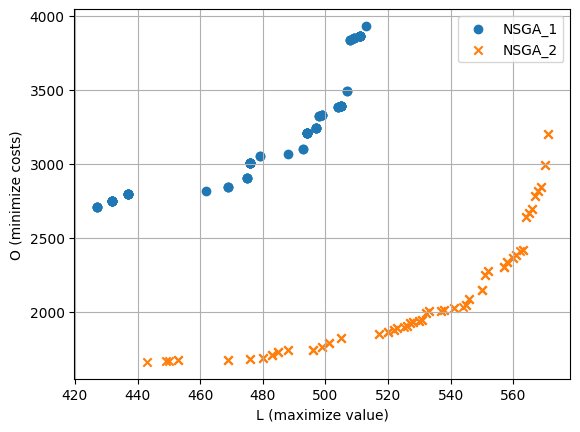

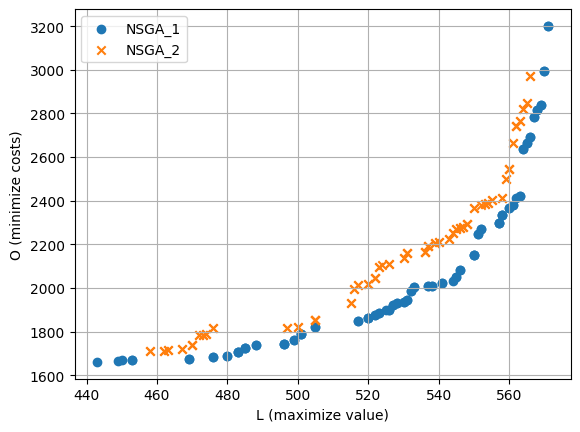

In [42]:
#Comparamos entre nsga2s
points_nsga2_1 = read_nsga_data("huge.out")[-1]
points_nsga2_2 = read_nsga_data("huge_nsga_5000_0.2_0.8.out")[-1]

compare_nsgas(points_nsga2_1, points_nsga2_2)



points_nsga2_1 = read_nsga_data("huge_nsga_5000_0.2_0.8.out")[-1]
points_nsga2_2 = read_nsga_data("huge_nsga_3000_0.2_0.8.out")[-1]
compare_nsgas(points_nsga2_1, points_nsga2_2)


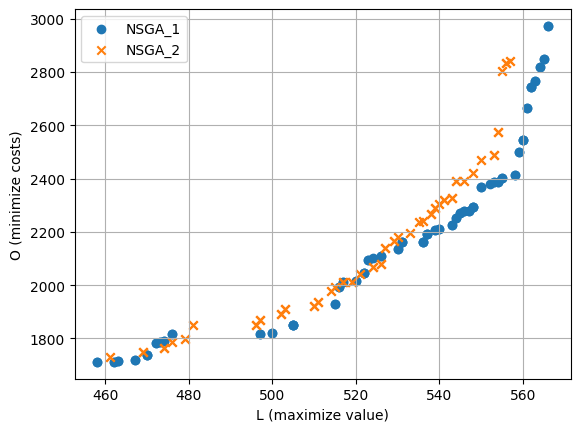

In [43]:
points_nsga2_1 = read_nsga_data("huge_nsga_3000_0.2_0.8.out")[-1]
points_nsga2_2 = read_nsga_data("huge_nsga_3000_0.4_0.8.out")[-1]
compare_nsgas(points_nsga2_1, points_nsga2_2)

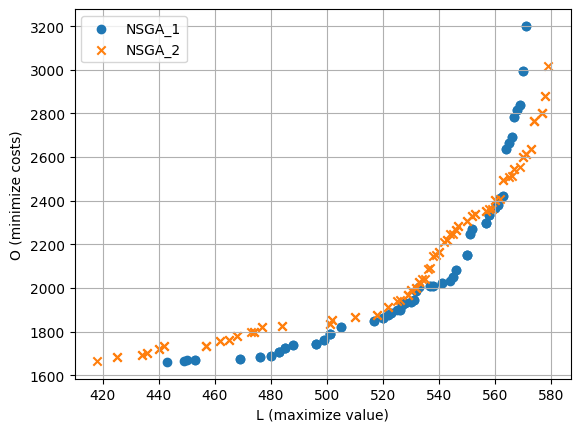

In [44]:

points_nsga2_1 = read_nsga_data("huge_nsga_5000_0.2_0.8.out")[-1]
points_nsga2_2 = read_nsga_data("huge_nsga_3000_0.1_0.8.out")[-1]
compare_nsgas(points_nsga2_1, points_nsga2_2)



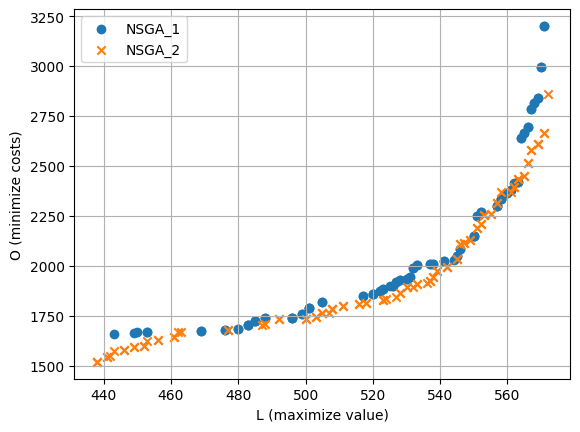

In [45]:
points_nsga2_1 = read_nsga_data("huge_nsga_5000_0.2_0.8.out")[-1]
points_nsga2_2 = read_nsga_data("huge_nsga_3000_0.1_0.9.out")[-1]
compare_nsgas(points_nsga2_1, points_nsga2_2)

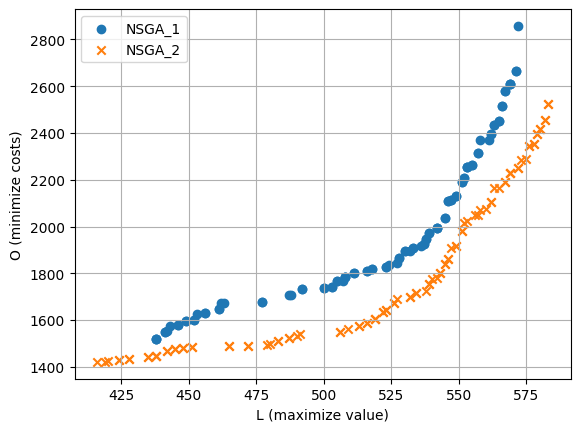

In [46]:
points_nsga2_1 = read_nsga_data("huge_nsga_3000_0.1_0.9.out")[-1]
points_nsga2_2 = read_nsga_data("huge_nsga_10000_0.1_0.9.out")[-1]
compare_nsgas(points_nsga2_1, points_nsga2_2)

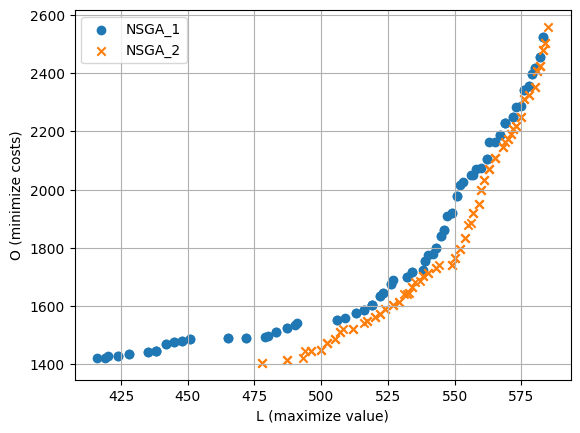

In [47]:
points_nsga2_1 = read_nsga_data("huge_nsga_10000_0.1_0.9.out")[-1]
points_nsga2_2 = read_nsga_data("huge_nsga_20000_0.1_0.9.out")[-1]
compare_nsgas(points_nsga2_1, points_nsga2_2)

# Selected plots

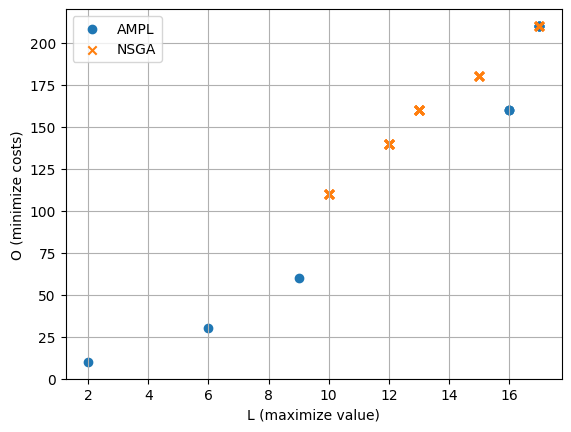

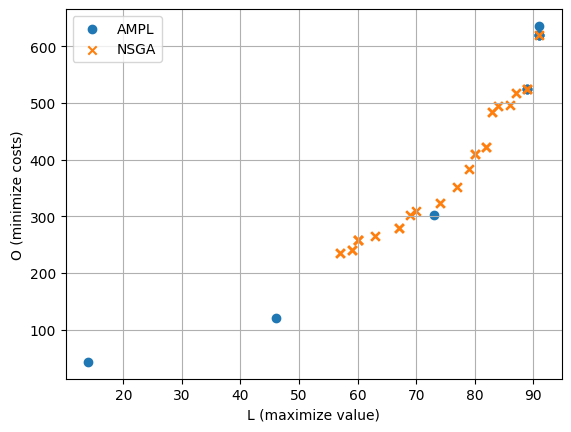

C:\Users\basti\AppData\Local\Temp\ipykernel_10100\811519211.py:77: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_ranks))


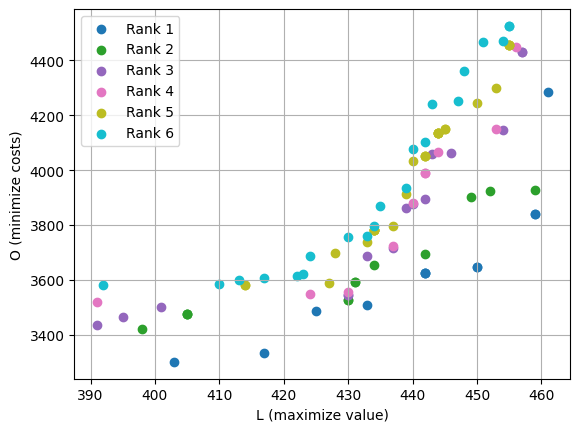

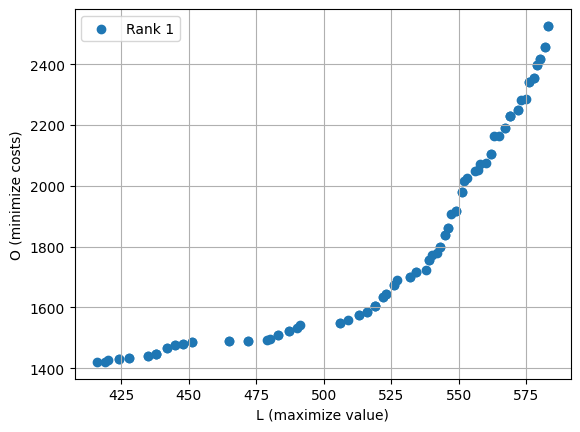

In [48]:
points_ampl = data_small_ampl
points_nsga = read_nsga_data("small.out")[-1] #Este es 100 0.5 0.5
show_both(points_ampl, points_nsga)

points_ampl = data_big_ampl
points_nsga = read_nsga_data("big_nsga_1500_0.4_0.8.out")[-1]
show_both(points_ampl, points_nsga)

data_nsga = read_nsga_data("huge_nsga_10000_0.1_0.9.out")
show_gen_nsga2(data_nsga, 4)
show_gen_nsga2(data_nsga, -1)

## Descripción solución pequeña:

### AMPL
f1 (Valor observación): 17.00   
f2 (Costos): 210.00   
 
Secuencia:
* Cola: 1 - objetivo: o1 en el horario: 0 - 100  
* Cola: 1 - objetivo: o2 en el horario: 110 - 210  
* Cola: 1 - objetivo: o3 en el horario: 300 - 400  
* Cola: 1 - objetivo: o4 en el horario: 400 - 500  

Descripción costos:  
* Costo inicial (o1 en cola 1): 50.00  
* Cola 1: Desde o1 hasta o2: 40.00  
* Cola 1: Desde o2 hasta o3: 90.00  
* Cola 1: Desde o3 hasta o4: 30.00 

### NSGA-II
f1 (Valor observación): 17.00   
f2 (Costos): 210.00 

Permutación: 2 7 3 0 1 4 5 6

Secuencia: 
* Cola: 1 - objetivo: o1 en el horario: 0 - 100  
* Cola: 1 - objetivo: o2 en el horario: 110 - 210  
* Cola: 1 - objetivo: o3 en el horario: 280 - 380  
* Cola: 1 - objetivo: o4 en el horario: 400 - 500  

Descipción de costos:
* Start_cost = 50
* o1 a o2  = 40
* o2 a o3 = 90
* o3 a o4 = 30



Otra solución nsga-2  (Genera exactamente lo mismo)
2 1 0 4 5 7 6 3

# Comparar semillas

Aqui se comparan las semillas 0.123 y la 0.00042 para la instancia big

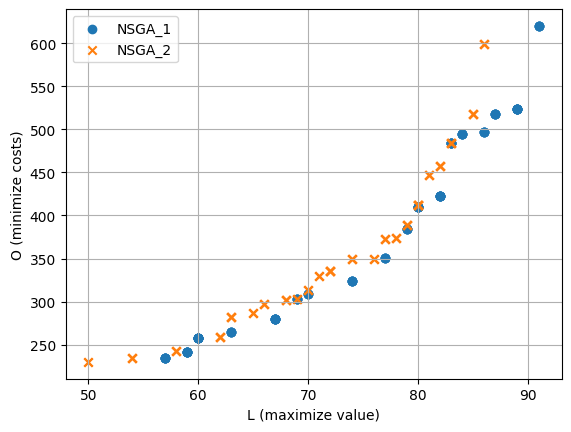

In [49]:
points_nsga_1 = read_nsga_data("big_nsga_1500_0.4_0.8.out")[-1]
points_nsga_2 = read_nsga_data("big_nsga_1500_0.4_0.8_other_seed.out")[-1]
compare_nsgas(points_nsga_1, points_nsga_2)

# Comparación de Soluciones para instancia BIG:
